# Load data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, optimizers, callbacks
from keras.regularizers import l2
from sklearn.model_selection import KFold
from keras.models import Sequential
import seaborn as sns
from keras.utils import to_categorical
from tensorflow.keras import layers, models, Input
from sklearn.metrics import confusion_matrix

2024-09-26 03:46:58.393731: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-26 03:46:58.576328: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-26 03:46:58.764481: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 03:46:58.850409: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-26 03:46:58.878382: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-26 03:46:59.227314: I tensorflow/core/platform/cpu_feature_gu

In [62]:
train_images = np.load("data/train_images.npy")
train_labels = np.load("data/train_labels.npy")
test_images = np.load("data/test_images.npy")
test_labels = np.load("data/test_labels.npy")

# Display images

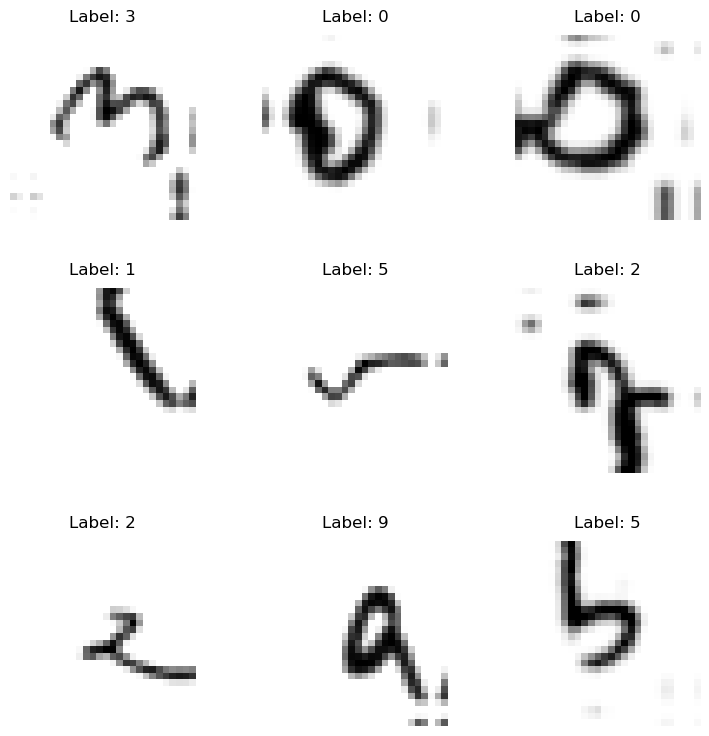

In [3]:
num_images = 9

random_indices = np.random.choice(train_images.shape[0], num_images, replace=False)

# Display images
plt.figure(figsize=(8, 8)) 
for i, idx in enumerate(random_indices):
    plt.subplot(3, 3, i + 1)
    plimage = train_images[idx]
    plt.imshow(plimage.reshape(28, 28), cmap=plt.cm.binary)
    
    label = np.argmax(train_labels[idx]) if train_labels.ndim > 1 else train_labels[idx]

    plt.title(f"Label: {label}", fontsize=12, pad=10, loc='center')
    plt.axis('off')

plt.tight_layout(pad=3.0) 
plt.show()

# Dense Network

## Data processing

In [63]:
# (784 pixels for one image)
num_pixels = train_images.shape[1] * train_images.shape[2]  # 28*28 = 784
train_images = train_images.reshape(train_images.shape[0], num_pixels)
test_images = test_images.reshape(test_images.shape[0], num_pixels)

test_images = test_images / 255

# One hot encoding 
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

## Model construction

In [5]:
model = keras.Sequential()

# Hidden Layer 256 neurons with ReLU activation
model.add(keras.layers.Dense(256, activation='relu', input_shape=(num_pixels,)))

# 30% of Dropout for overfitting
model.add(keras.layers.Dropout(0.3))

# Hidden Layer 128 neurons with ReLU activation
model.add(keras.layers.Dense(128, activation='relu'))

# 30% of Dropout
model.add(keras.layers.Dropout(0.3))

# output 10 neurons with softmax activation
model.add(keras.layers.Dense(num_classes, activation='softmax'))


model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/home/romain/miniconda3/envs/DL_environment/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

## Training model

In [6]:
# Entraîner le modèle
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2863 - loss: 1.9799 - val_accuracy: 0.6325 - val_loss: 1.1810
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5587 - loss: 1.3133 - val_accuracy: 0.7113 - val_loss: 0.9188
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6269 - loss: 1.1266 - val_accuracy: 0.7455 - val_loss: 0.8099
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6660 - loss: 1.0131 - val_accuracy: 0.7614 - val_loss: 0.7636
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6890 - loss: 0.9546 - val_accuracy: 0.7761 - val_loss: 0.7318
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7084 - loss: 0.9081 - val_accuracy: 0.7834 - val_loss: 0.7058
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7194 - loss: 0.8776 - val_accuracy: 0.8012 - val_loss: 0.6529
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7278 - loss: 0.8568 - val_accuracy: 0.

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8092 - loss: 0.6470
Test accuracy: 0.8212000131607056


## Results with graphs

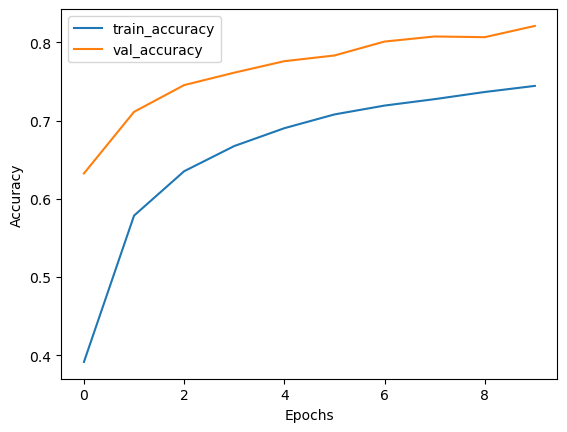

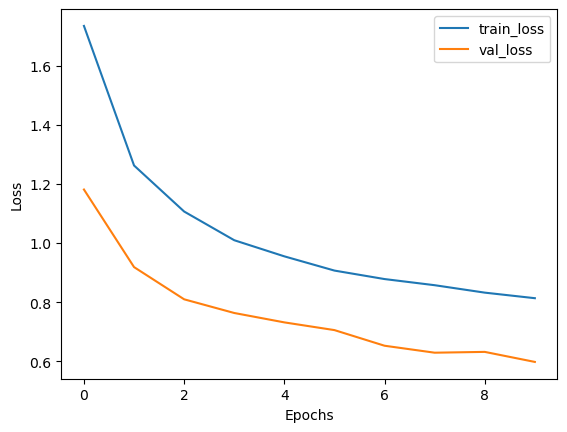

In [8]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Prediction

In [9]:
predicted_probabilities = model.predict(test_images)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# True predicts
correct_indices = np.nonzero(predicted_classes == true_classes)[0]

# Wrong predicts
incorrect_indices = np.nonzero(predicted_classes != true_classes)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


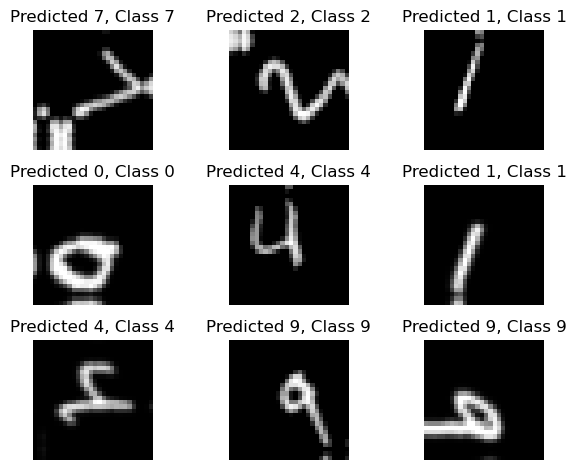

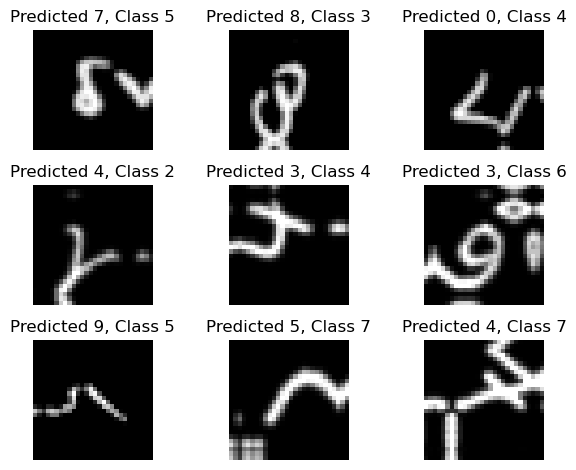

In [10]:
true_classes = np.argmax(test_labels, axis=1)

# Display images with correct prediction
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title(f"Predicted {predicted_classes[correct]}, Class {true_classes[correct]}")
    plt.axis('off')
plt.tight_layout()

# Display images with incorrect prediction
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title(f"Predicted {predicted_classes[incorrect]}, Class {true_classes[incorrect]}")
    plt.axis('off')
plt.tight_layout()

plt.show()

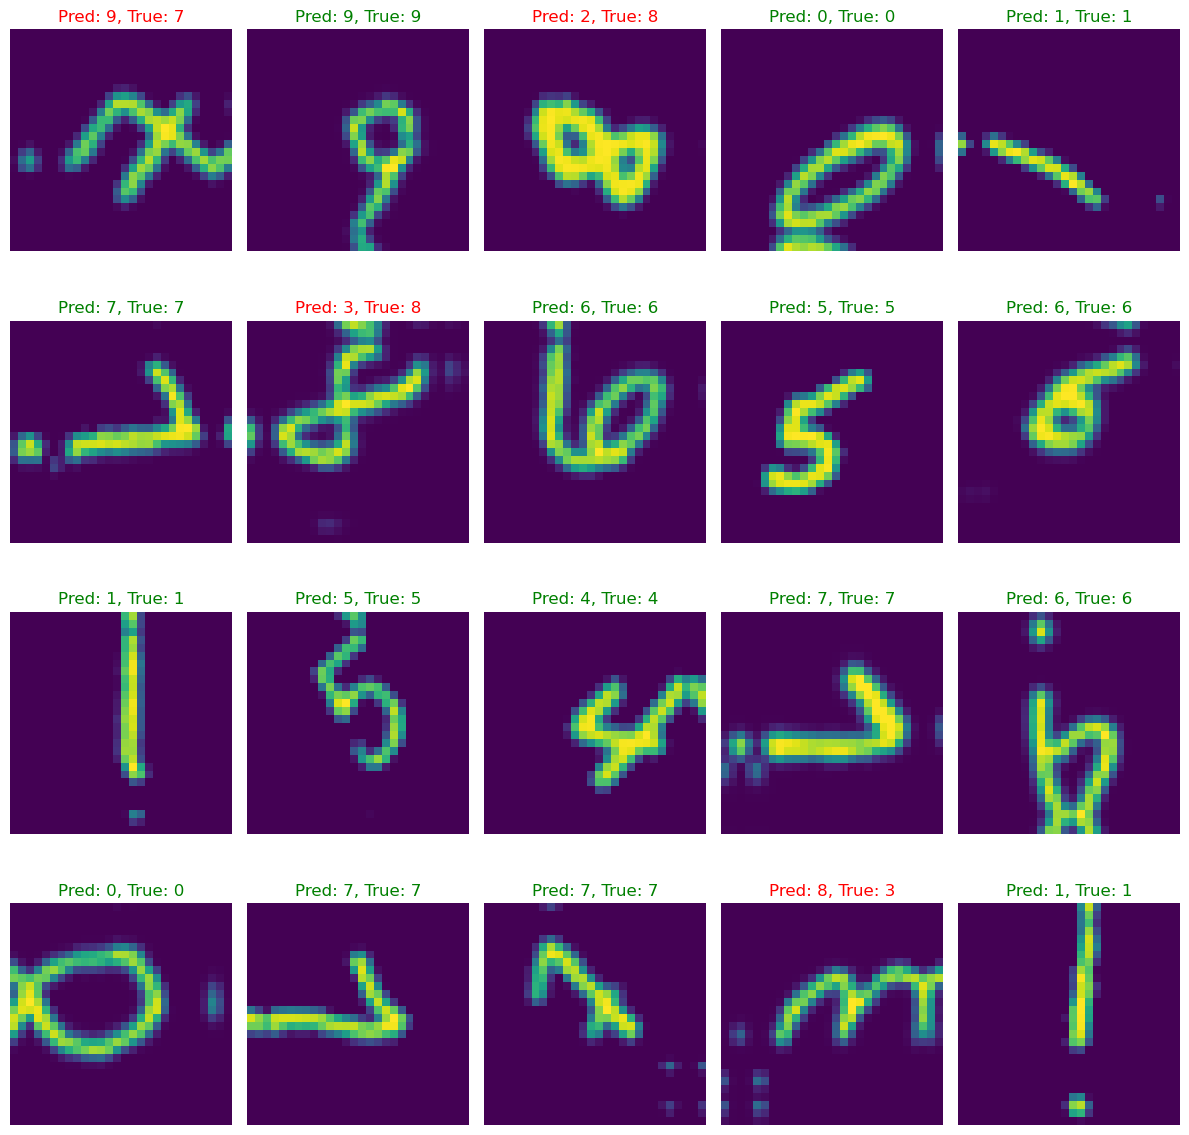

In [11]:
num_images = 20
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)
true_classes = np.argmax(test_labels, axis=1)

plt.figure(figsize=(12, 12))
for i, idx in enumerate(random_indices):
    plt.subplot(4, 5, i + 1)  
    plt.imshow(test_images[idx].reshape(28, 28), cmap='viridis', interpolation='none')
    
    if predicted_classes[idx] == true_classes[idx]:
        title_color = 'green'  # Green for correct prediction
    else:
        title_color = 'red'  # Red for incorrect prediction
    
    plt.title(f"Pred: {predicted_classes[idx]}, True: {true_classes[idx]}", color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Confusion matrix

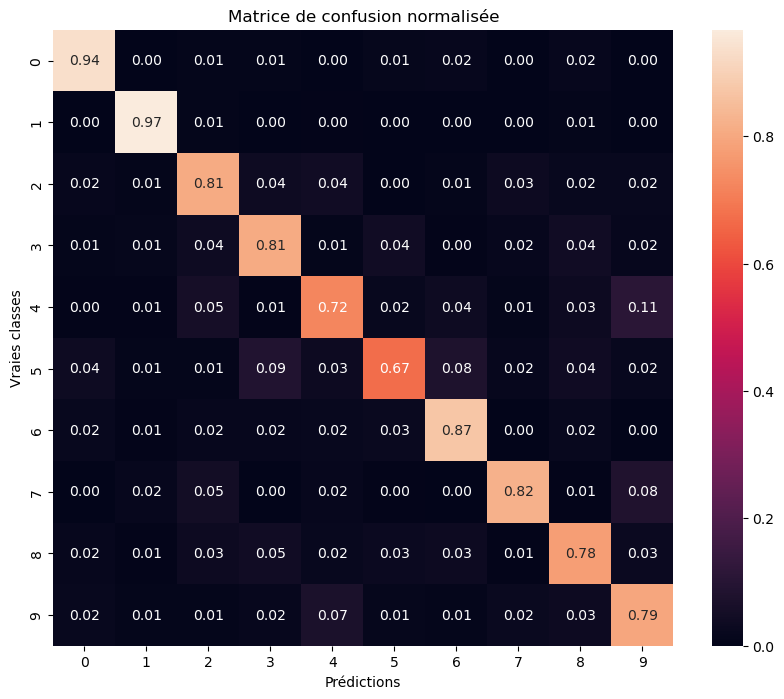

In [12]:
conf_matrix = confusion_matrix(true_classes, predicted_classes, normalize='true')

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", xticklabels=np.unique(true_classes), yticklabels=np.unique(true_classes))
plt.title('Matrice de confusion normalisée')
plt.xlabel('Prédictions')
plt.ylabel('Vraies classes')
plt.show()

## Results

With this model, we don't obtain very good results. As we can see for both accuracy and loss graph, the train prediction is far from the validation. That means our model is not optimize for these data. We can see as well that our prediction value is not very good and can be higher.

# Upgrade Dense Network

## Model Construction

In [64]:
model = keras.Sequential()

# First dense layer with more neurons
model.add(layers.Dense(512, activation='relu', input_shape=(num_pixels,)))
model.add(layers.BatchNormalization())  # Batch normalization after the activation

# Dropout to prevent overfitting
model.add(layers.Dropout(0.3))

# Second dense layer with more neurons
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

# Third dense layer
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

# Output layer with softmax activation for classification
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model using Adam optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,018 (2.18 MB)

 Trainable params: 569,226 (2.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

## Training model

In [65]:
history = model.fit(train_images, train_labels,
                    epochs=20,
                    batch_size=600,
                    validation_data=(test_images, test_labels))

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.2622 - loss: 2.2847 - val_accuracy: 0.2876 - val_loss: 1.9767
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5286 - loss: 1.3828 - val_accuracy: 0.4688 - val_loss: 1.5134
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6387 - loss: 1.0800 - val_accuracy: 0.6687 - val_loss: 1.0502
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6915 - loss: 0.9236 - val_accuracy: 0.7708 - val_loss: 0.7372
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7269 - loss: 0.8270 - val_accuracy: 0.8012 - val_loss: 0.6314
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7557 - loss: 0.7355 - val_accuracy: 0.8131 - val_loss: 0.5717
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7739 - loss: 0.6814 - val_accuracy: 0.8263 - val_loss: 0.5473
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7899 - loss: 0.6339 - val_accu

In [66]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8754 - loss: 0.4037
Test accuracy: 0.8840000033378601


## Results with graphs

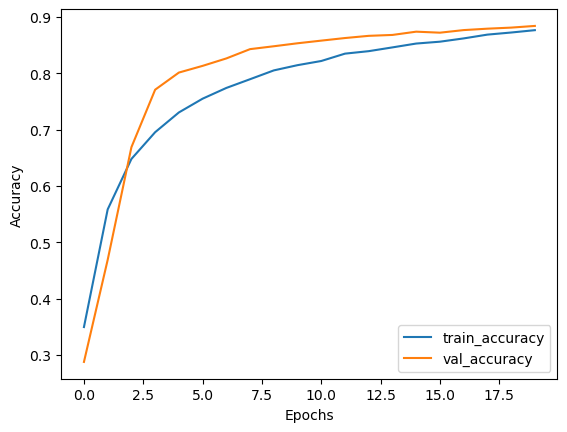

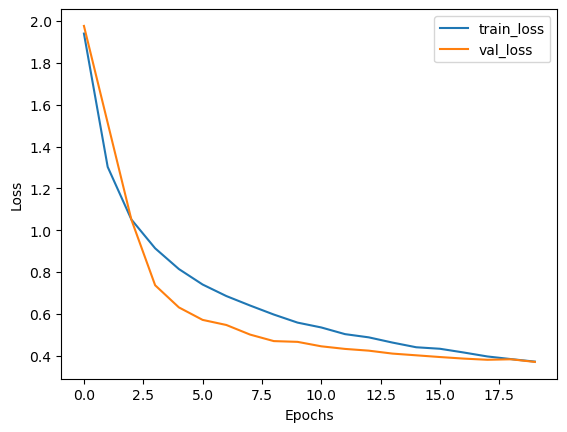

In [67]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Prediction

In [17]:
predicted_probabilities = model.predict(test_images)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# True predicts
correct_indices = np.nonzero(predicted_classes == true_classes)[0]

# Wrong predicts
incorrect_indices = np.nonzero(predicted_classes != true_classes)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


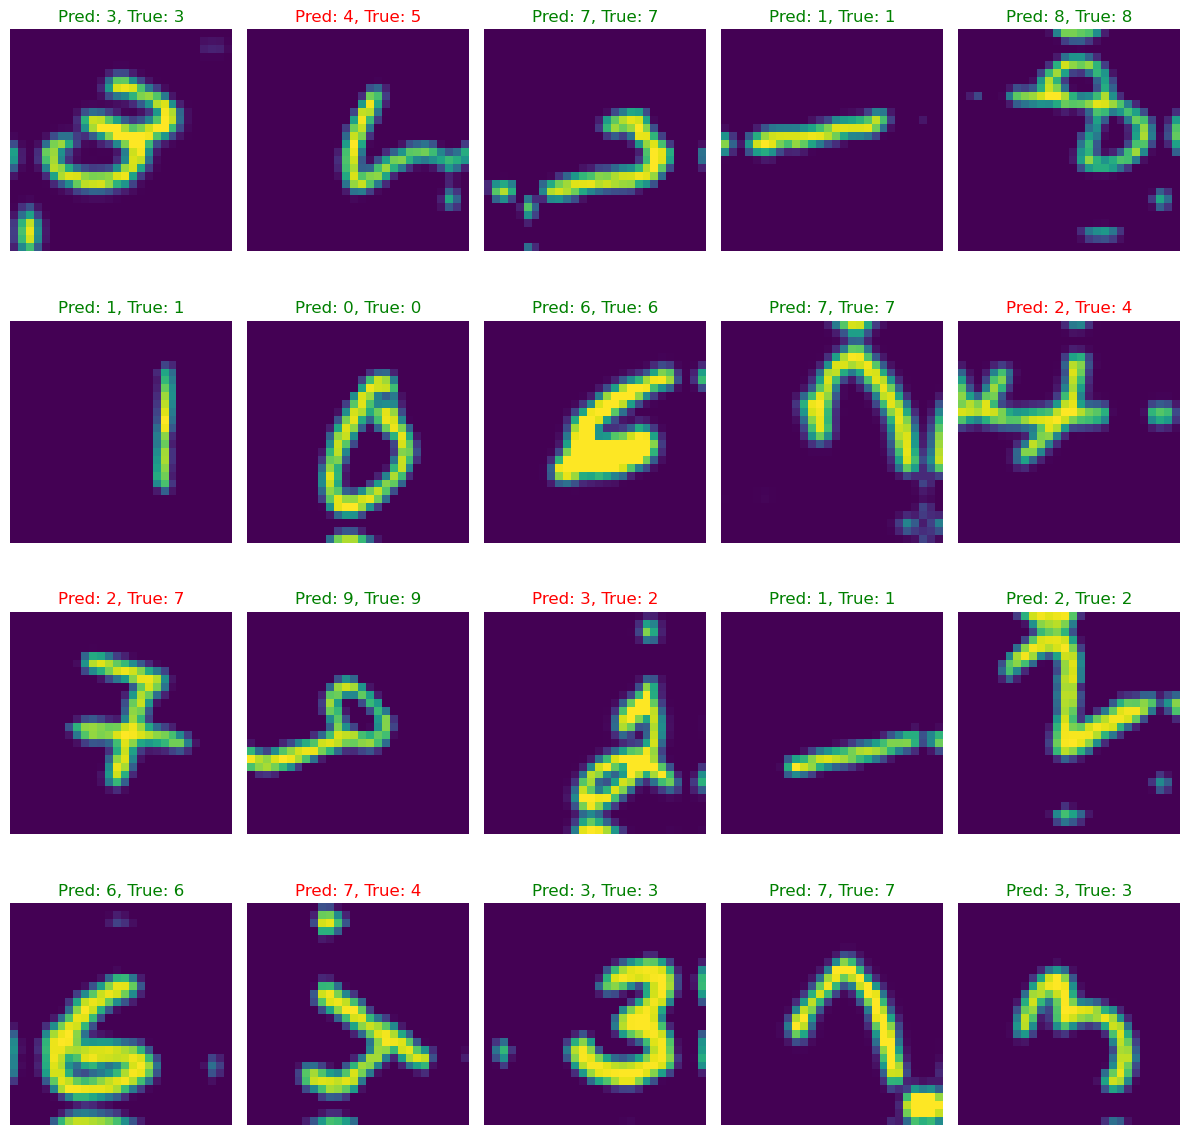

In [18]:
num_images = 20
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)
true_classes = np.argmax(test_labels, axis=1)

plt.figure(figsize=(12, 12))
for i, idx in enumerate(random_indices):
    plt.subplot(4, 5, i + 1)  
    plt.imshow(test_images[idx].reshape(28, 28), cmap='viridis', interpolation='none')
    
    if predicted_classes[idx] == true_classes[idx]:
        title_color = 'green'  # Green for correct prediction
    else:
        title_color = 'red'  # Red for incorrect prediction
    
    plt.title(f"Pred: {predicted_classes[idx]}, True: {true_classes[idx]}", color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Confusion matrix

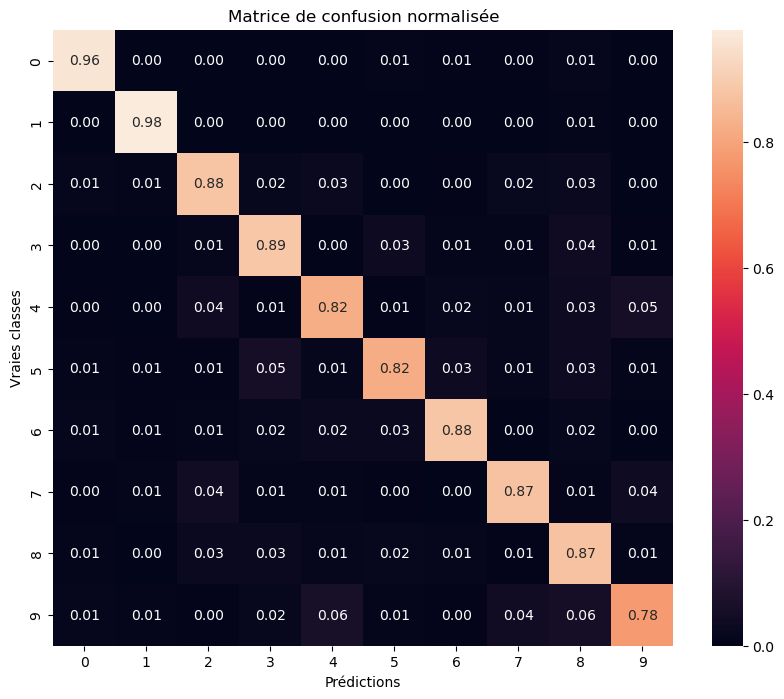

In [23]:
conf_matrix = confusion_matrix(true_classes, predicted_classes, normalize='true')

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", xticklabels=np.unique(true_classes), yticklabels=np.unique(true_classes))
plt.title('Matrice de confusion normalisée')
plt.xlabel('Prédictions')
plt.ylabel('Vraies classes')
plt.show()

## Results

The first model is a more complex neural network with three hidden layers and higher neuron counts (512, 256, 128). It uses Batch Normalization after each layer for improved training stability and convergence. The dropout rate is lower at 10%, which may result in less regularization. In contrast, the second model has two hidden layers with fewer neurons (256, 128) and a higher dropout rate of 30% for stronger overfitting prevention. Additionally, the first model uses the Adam optimizer, while the second uses RMSprop for learning rate adaptation.

In consequence of these changes, we obtain better prediction results. But the results are still not optimal, so we going to try a new model

# Deep Convolutional Neural Network

## Data processing

In [6]:
train_images2D = np.load("data/train_images.npy")
train_labels2D = np.load("data/train_labels.npy")
test_images2D = np.load("data/test_images.npy")
test_labels2D = np.load("data/test_labels.npy")

In [7]:
# Reshape images in 28x28 with 1 channel
train_images2D = train_images2D.reshape(train_images2D.shape[0], 28, 28, 1)
test_images2D = test_images2D.reshape(test_images2D.shape[0], 28, 28, 1)

test_images2D = test_images2D / 255

# One hot encoding des labels
num_classes = 10
train_labels2D = keras.utils.to_categorical(train_labels2D, num_classes)
test_labels2D = keras.utils.to_categorical(test_labels2D, num_classes)

## Model construction

In [8]:
model = keras.Sequential()

# First convolution layer
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

# Second convolution layer
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

# Third convolution layer
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

# Flatten and add dense layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes for MNIST

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/home/romain/miniconda3/envs/DL_environment/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 437,610 (1.67 MB)

 Trainable params: 436,458 (1.66 MB)

 Non-trainable params: 1,152 (4.50 KB)

## Training model

In [ ]:
history = model.fit(train_images2D, train_labels2D, batch_size=64, epochs=10, validation_data=(test_images2D, test_labels2D))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 337s 349ms/step - accuracy: 0.5770 - loss: 1.3251 - val_accuracy: 0.9426 - val_loss: 0.1928
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 279s 297ms/step - accuracy: 0.9333 - loss: 0.2232 - val_accuracy: 0.9640 - val_loss: 0.1173
Epoch 3/10
238/938 ━━━━━━━━━━━━━━━━━━━━ 3:33 305ms/step - accuracy: 0.9516 - loss: 0.1578

In [ ]:
test_loss, test_acc = model.evaluate(test_images2D, test_labels2D)
print(f"Test accuracy: {test_acc}")

## Results with graphs

In [ ]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Prediction

In [27]:
predicted_probabilities2D = model.predict(test_images2D)
predicted_classes2D = np.argmax(predicted_probabilities2D, axis=1)
true_classes2D = np.argmax(test_labels2D, axis=1)

# True predicts
correct_indices2D = np.nonzero(predicted_classes2D == true_classes2D)[0]

# Wrong predicts
incorrect_indices2D = np.nonzero(predicted_classes2D != true_classes2D)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


In [28]:
# Prediction accuracy
total_examples2D = test_images2D.shape[0]
correct_predictions2D = len(correct_indices2D)

accuracy2D = correct_predictions2D / total_examples2D
print(f"Taux de bonnes prédictions : {accuracy2D * 100:.2f}%")


Taux de bonnes prédictions : 98.25%


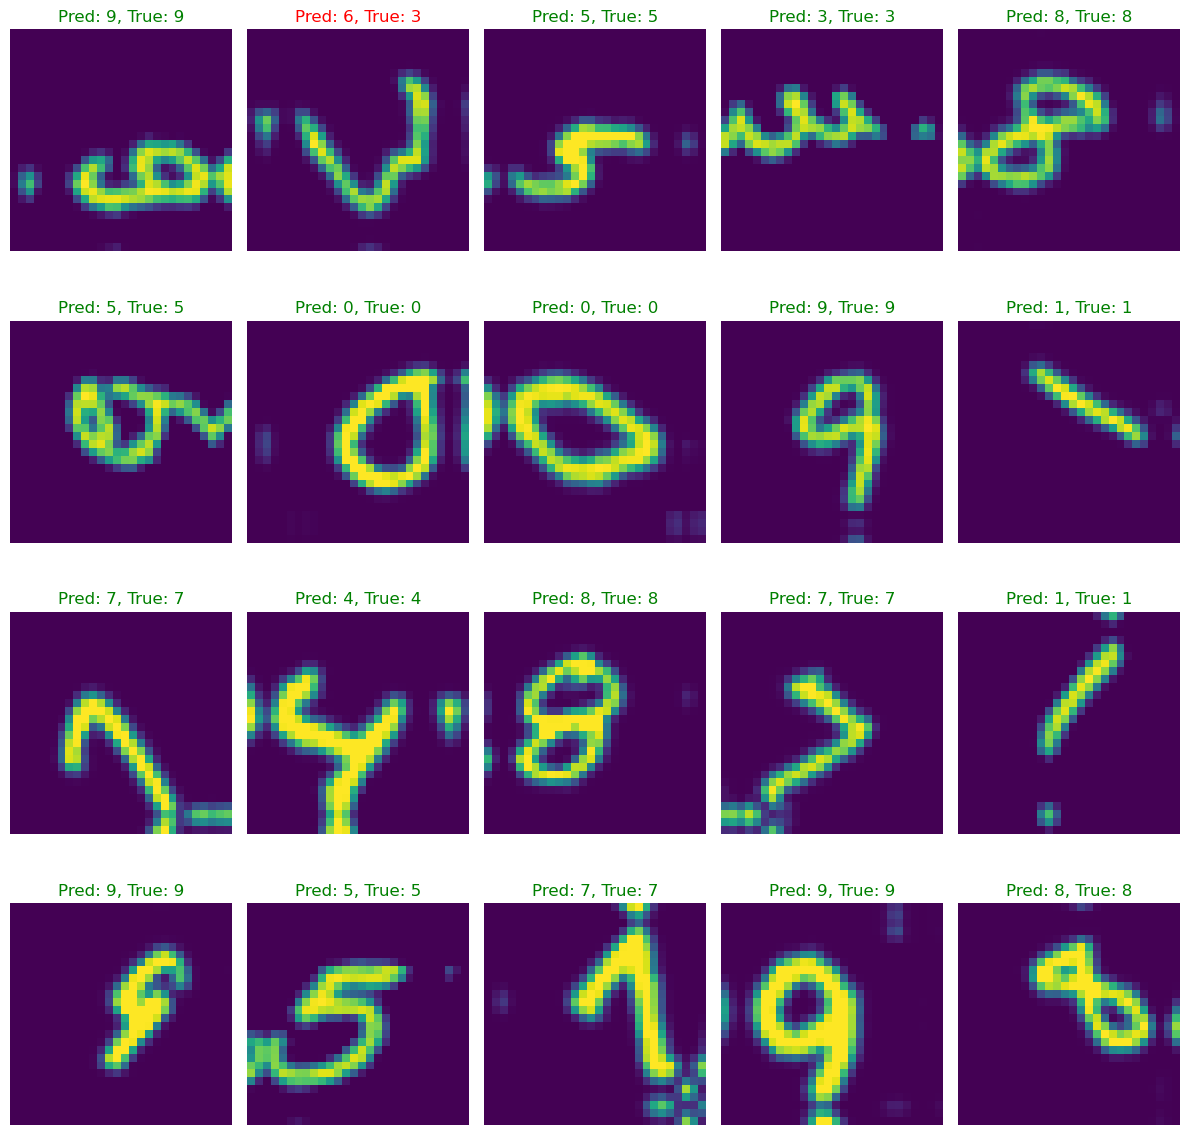

In [29]:
num_images = 20
random_indices2D = np.random.choice(test_images2D.shape[0], num_images, replace=False)

plt.figure(figsize=(12, 12))
for i, idx in enumerate(random_indices2D):
    plt.subplot(4, 5, i + 1)  
    plt.imshow(test_images2D[idx].reshape(28, 28), cmap='viridis', interpolation='none')
    
    if predicted_classes2D[idx] == true_classes2D[idx]:
        title_color = 'green'  # Green for correct prediction
    else:
        title_color = 'red'  # Red for incorrect prediction
    
    plt.title(f"Pred: {predicted_classes2D[idx]}, True: {true_classes2D[idx]}", color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Confusion matrix

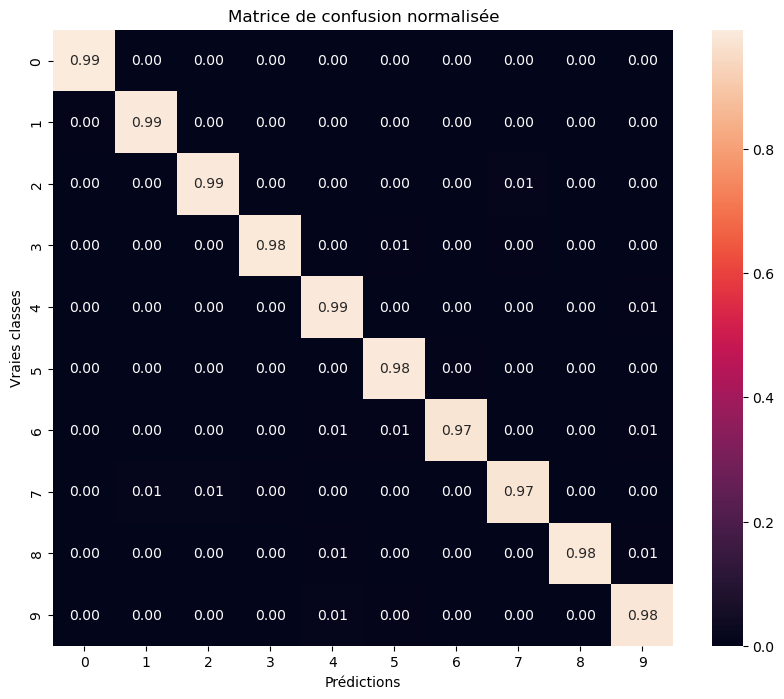

In [30]:
conf_matrix2D = confusion_matrix(true_classes2D, predicted_classes2D, normalize='true')

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix2D, annot=True, fmt=".2f", xticklabels=np.unique(true_classes2D), yticklabels=np.unique(true_classes2D))
plt.title('Matrice de confusion normalisée')
plt.xlabel('Prédictions')
plt.ylabel('Vraies classes')
plt.show()

## Results

We obtain slighly better results than the previous model. With a prediction around 98%, the Deep Convolutional Neural Network work very good on this type of data.

# Resnet

## Data processing

In [2]:
train_images2D = np.load("data/train_images.npy")
train_labels2D = np.load("data/train_labels.npy")
test_images2D = np.load("data/test_images.npy")
test_labels2D = np.load("data/test_labels.npy")

In [3]:
# Reshape images in 28x28 with 1 channel
train_images2D = train_images2D.reshape(train_images2D.shape[0], 28, 28, 1)
test_images2D = test_images2D.reshape(test_images2D.shape[0], 28, 28, 1)

test_images2D = test_images2D / 255

# One hot encoding des labels
num_classes = 10
train_labels2D = keras.utils.to_categorical(train_labels2D, num_classes)
test_labels2D = keras.utils.to_categorical(test_labels2D, num_classes)

## Model construction

In [4]:
def residual_block(x, filters):
    # Save the original input for the residual connection
    shortcut = x
    
    # First convolution layer
    x = layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Second convolution layer
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Shortcut connection (add the original input to the output)
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)

    return x

# Define the input shape (28, 28, 1) for MNIST
input = Input(shape=(28, 28, 1))

# First convolution layer (without residual block)
x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(input)
x = layers.BatchNormalization()(x)

# Add a residual block
x = residual_block(x, 32)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.3)(x)

# Second convolution block with a residual block
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = residual_block(x, 64)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.3)(x)

# Third convolution block with a residual block
x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = residual_block(x, 128)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.3)(x)

# Flatten and add fully connected layers
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

# Output layer (10 classes for MNIST)
output = layers.Dense(10, activation='softmax')(x)


resnet_model = models.Model(inputs=input, outputs=output)

resnet_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

resnet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 28, 28,    │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 28, 28,    │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 28, 28,    │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 28, 28,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 28, 28,    │          0 │ add[0][0]         │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 14, 14,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 14, 14,    │          0 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 14, 14,    │     18,496 │ dropout[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 14, 14,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 14, 14,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_5[0][0]  

 Total params: 632,266 (2.41 MB)

 Trainable params: 630,666 (2.41 MB)

 Non-trainable params: 1,600 (6.25 KB)

## Training model

In [6]:
history = resnet_model.fit(train_images2D, train_labels2D, batch_size=64, epochs=10, validation_data=(test_images2D, test_labels2D))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 475s 503ms/step - accuracy: 0.5919 - loss: 1.2741 - val_accuracy: 0.9419 - val_loss: 0.1946
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 528s 563ms/step - accuracy: 0.9388 - loss: 0.2063 - val_accuracy: 0.9586 - val_loss: 0.1350
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 407s 433ms/step - accuracy: 0.9576 - loss: 0.1406 - val_accuracy: 0.9758 - val_loss: 0.0778
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 452s 481ms/step - accuracy: 0.9647 - loss: 0.1157 - val_accuracy: 0.9767 - val_loss: 0.0742
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 410s 437ms/step - accuracy: 0.9712 - loss: 0.0955 - val_accuracy: 0.9779 - val_loss: 0.0718
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 382s 407ms/step - accuracy: 0.9727 - loss: 0.0862 - val_accuracy: 0.9817 - val_loss: 0.0632
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 357s 380ms/step - accuracy: 0.9759 - loss: 0.0809 - val_accuracy: 0.9804 - val_loss: 0.0649
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 356s 380ms/step - accuracy: 0.9808 -

In [7]:
test_loss, test_acc = resnet_model.evaluate(test_images2D, test_labels2D)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.9782 - loss: 0.0717
Test accuracy: 0.9812999963760376


## Results with graphs

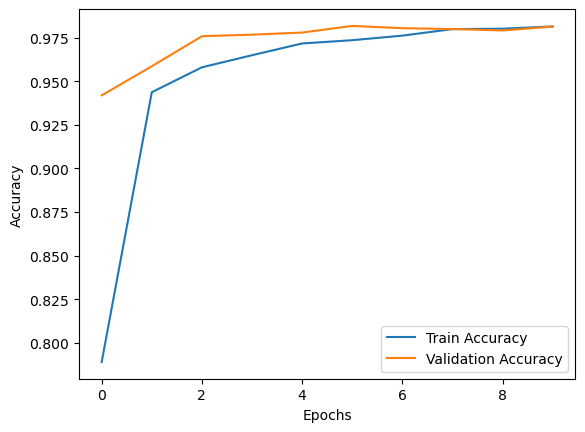

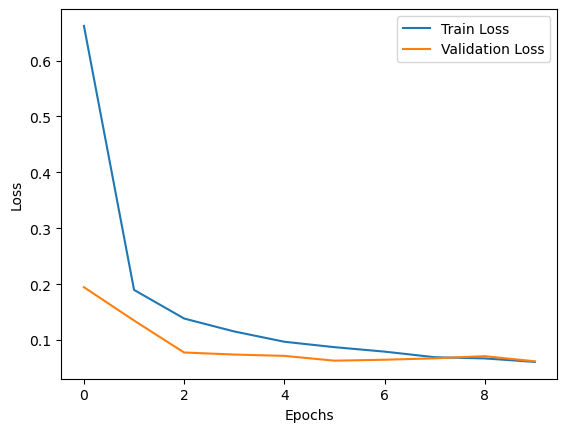

In [8]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Prediction

In [10]:
predicted_probabilities2D = resnet_model.predict(test_images2D)
predicted_classes2D = np.argmax(predicted_probabilities2D, axis=1)
true_classes2D = np.argmax(test_labels2D, axis=1)

# True predicts
correct_indices2D = np.nonzero(predicted_classes2D == true_classes2D)[0]

# Wrong predicts
incorrect_indices2D = np.nonzero(predicted_classes2D != true_classes2D)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step


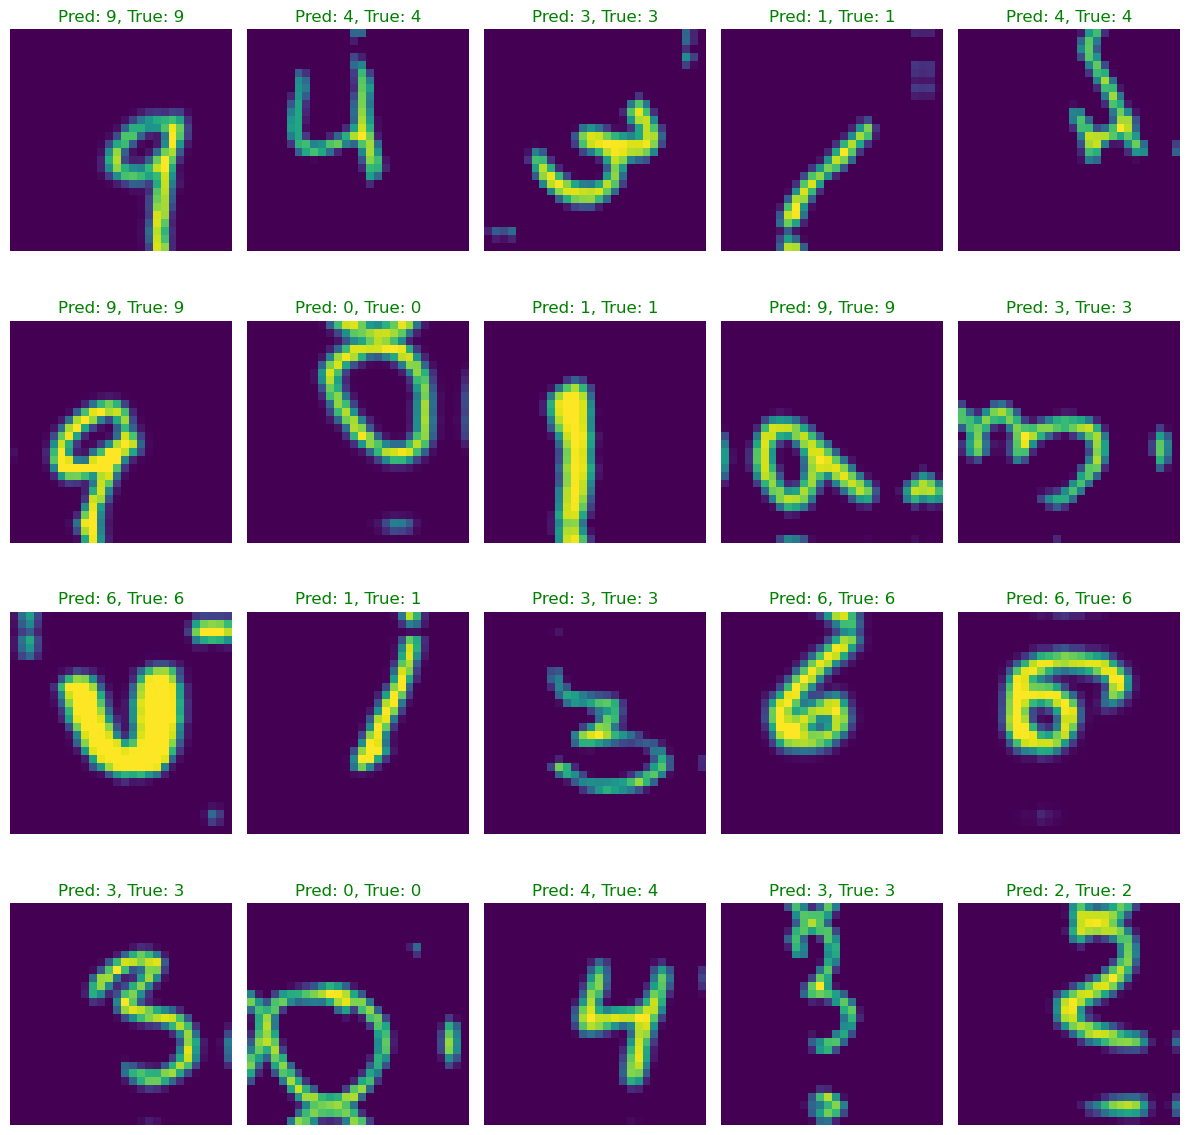

In [11]:
num_images = 20
random_indices2D = np.random.choice(test_images2D.shape[0], num_images, replace=False)

plt.figure(figsize=(12, 12))
for i, idx in enumerate(random_indices2D):
    plt.subplot(4, 5, i + 1)  
    plt.imshow(test_images2D[idx].reshape(28, 28), cmap='viridis', interpolation='none')
    
    if predicted_classes2D[idx] == true_classes2D[idx]:
        title_color = 'green'  # Green for correct prediction
    else:
        title_color = 'red'  # Red for incorrect prediction
    
    plt.title(f"Pred: {predicted_classes2D[idx]}, True: {true_classes2D[idx]}", color=title_color)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Confusion matrix

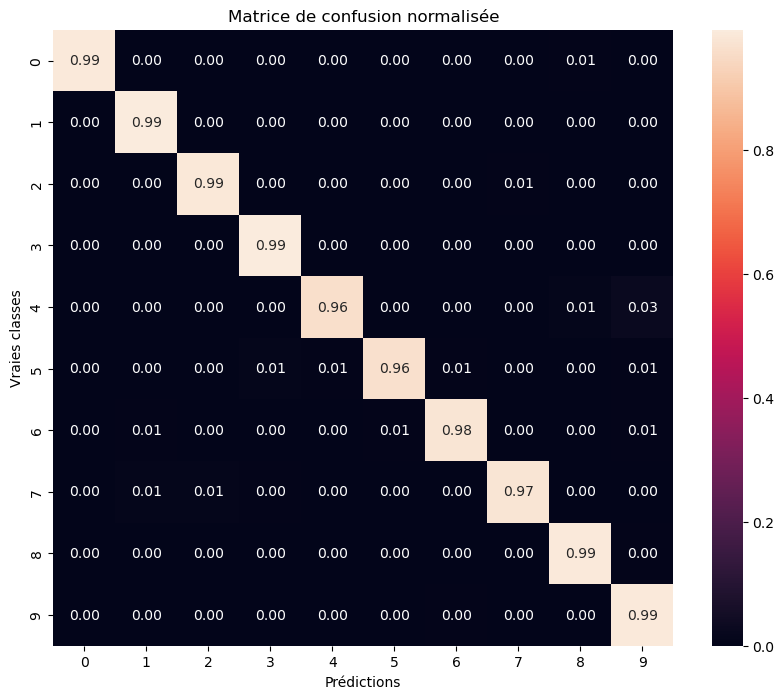

In [12]:
conf_matrix2D = confusion_matrix(true_classes2D, predicted_classes2D, normalize='true')

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix2D, annot=True, fmt=".2f", xticklabels=np.unique(true_classes2D), yticklabels=np.unique(true_classes2D))
plt.title('Matrice de confusion normalisée')
plt.xlabel('Prédictions')
plt.ylabel('Vraies classes')
plt.show()

## Results

With a resnet model, we also obtain very good results with a pretty high prediction